# Random Forest Classifiers
-------  

## Project Guide  
------------  
- [Project Overview](#project-overview)  
- [Part 1: Acquire, Explore, and Preprocess Data](#part1)
- [Part 2: Trees and Forests](#part2)
- [Part 3: Parameter Tuning](#part3)

<a id = "project-overview".></a>
## Project Overview
-------
#### EXPECTED TIME: 2 HRS  


This assignment uses a variety of decision tree based classifiers to attempt prediction of whether or not a customer will default on their loans. Our data comes from [the UCI machine learning Repository](https://archive.ics.uci.edu/ml/index.php) on [default of credit card clients](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#)  

Activities will include:  
- Manipulating DataFrames  
- Visualizing data  
- Calculation of impurity measures  
- Using `sklearn`'s tree and forest models  
- Evaluate the effects of hyperparameter tuning  


**Motivation**: Decision Trees and Forests offer easy to understand yet fairly advanced models with a variety of hyper-parameters to increase or decrease complexity to tune between bias and variance

**Problem**:  
Given a number of personal variables, (sex, education, marriage status, age); and recent payment history, attempt to predict whether or not a customer will default in the next month.   

**Data**:[Defaults of credit card clients](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#)  

Please see above link for a complete description of the  data.

---

```
Data Set Information:

This research aimed at the case of customersâ€™ default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.


Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
X2: Gender (1 = male; 2 = female). 
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
X4: Marital status (1 = married; 2 = single; 3 = others). 
X5: Age (year). 
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.
```
---

<a id="part1"></a>
## Part 1: Acquire, Explore, and Preprocess Data
----  

#### Import / Read in Data

In [1]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#
%matplotlib inline

# Read in Data
df = pd.read_excel("../resource/asnlib/publicdata/default of credit card clients.xls", header = 1)

df.rename(columns = {"PAY_0":"PAY_1"}, inplace = True) #renaming mis-named column
df.head()

ImportError: Install xlrd >= 0.9.0 for Excel support

#### Investigating the Features:

In [83]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Note: The code-book only describes the education variable as having four values (1-4), yet, here, there are seven values (0-6).  
In some cases this might be grounds to throw out these unknown values (0,5,6). For now, we will leave them in, assuming that they have some (unknown to us) meaning.

In [84]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Note: Again, the code book only describes three values for marriage (1-3), yet here, "0" also appears. Given what we saw above, we might assume the "0" in these categorical variables is functionally used for the "null" value

In [85]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

Note: A slight imbalance exists representation of men and women, with women making up a little over 60% of our observations. Thankfully this column contains no "0"s.

#### A Closer look at the "PAY" variables

In [86]:
df['PAY_1'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

#### Investigate relationship between "Pay", "Bill_amt" and "Pay_amt" variables:

In [89]:
for i in [-2,-1,0,1,2,8]:
    print(df[df['PAY_1']==i][['PAY_1','BILL_AMT1','PAY_AMT1']].head(8), "\n")

    PAY_1  BILL_AMT1  PAY_AMT1
9      -2          0         0
23     -2       5512     19428
33     -2      10929      4152
34     -2      13709      5006
45     -2          0         0
52     -2      13465      7875
55     -2       1905      3640
65     -2     152519         0 

    PAY_1  BILL_AMT1  PAY_AMT1
1      -1       2682         0
4      -1       8617      2000
11     -1      12261     21818
12     -1      12137      1000
21     -1        316       316
28     -1        650      3415
30     -1      16646     17270
35     -1      30265       131 

    PAY_1  BILL_AMT1  PAY_AMT1
2       0      29239      1518
3       0      46990      2000
5       0      64400      2500
6       0     367965     55000
7       0      11876       380
8       0      11285      3329
10      0      11073      2306
14      0      70887      3000 

    PAY_1  BILL_AMT1  PAY_AMT1
13      1      65802      3200
15      1      50614         0
18      1          0         0
19      1          0         0
26

 Unclear exactly how these "PAY" variables work. Possibly they should be treated as categorical data instead of discrete and interval data, but, for this modeling task, keep them as interval data.

In [90]:
### Define function for creating histograms
def pay_hist(df, cols, ymax):
    plt.figure(figsize= (10,7)) # define fig size
    
    for index, col in enumerate(cols): # For each column passed to function
        plt.subplot(2,3, index +1) # plot on new subplot
        plt.ylim(ymax = ymax) # standardize ymax
        plt.hist(df[col]) # create hist
        plt.title(col) # title with column names
    plt.tight_layout(); # make sure titles don't overlap

pay_cols = ["PAY_"+str(n) for n in range(1,7)]
pay_amt_cols = ['PAY_AMT' + str(n) for n in range(1,7)]
bill_amt_cols = ['BILL_AMT' + str(n) for n in range(1,7)]

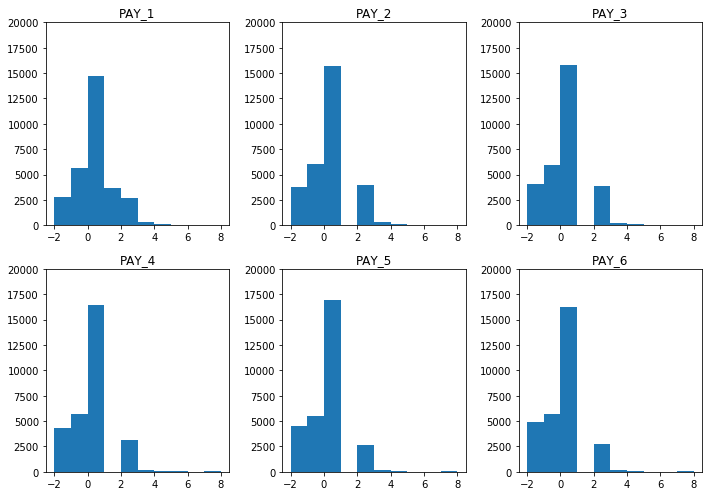

In [91]:
pay_hist(df, pay_cols, 20000)

Note: Clearly the "0" is the majority class for all of the "PAY" variables. But, unclear what a "0" means as it is not in the code book.

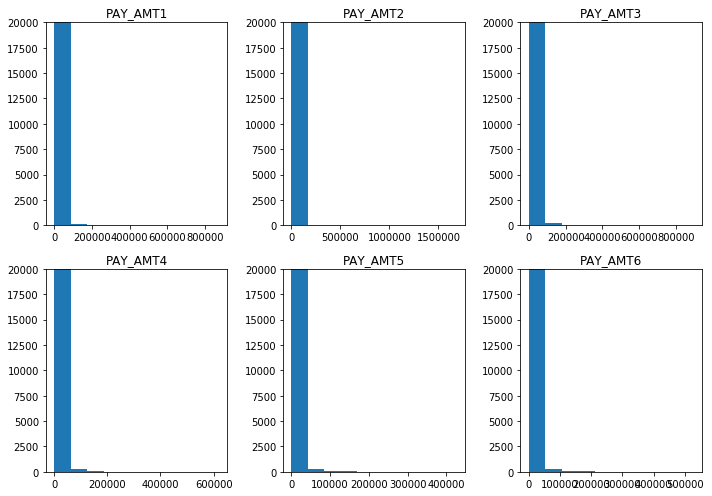

In [92]:
pay_hist(df, pay_amt_cols, 20000)

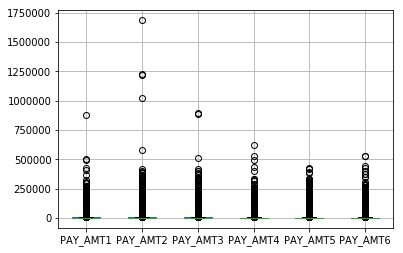

In [93]:
df[pay_amt_cols].boxplot();

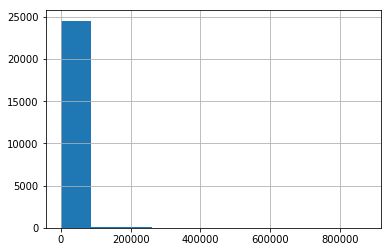

In [94]:
df_no_0_pay_amt_1 = df[df["PAY_AMT1"]!=0]
df_no_0_pay_amt_1["PAY_AMT1"].hist()

Even taking out all the PAY_AMT of 0, most payments stay close to 0 with a long tail.


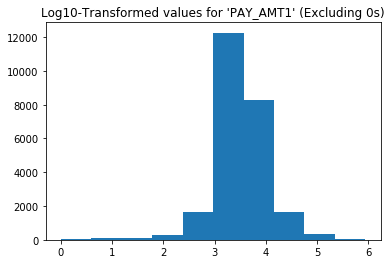

In [95]:
log_pay_amt1 = np.log10(df_no_0_pay_amt_1["PAY_AMT1"])
plt.hist(log_pay_amt1)
plt.title("Log10-Transformed values for 'PAY_AMT1' (Excluding 0s)");

Log Transformation (used above) or $\sqrt[4]{x}$ transformations (which automatically deals with 0s) can be a good way of looking more closely at skewed data. Above, we see that most of the repayment amounts are in the 1000's of dollars.

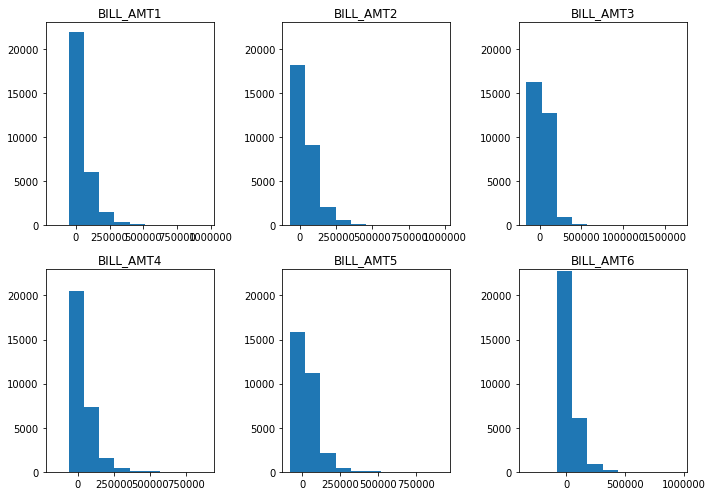

In [96]:
pay_hist(df, bill_amt_cols, 23000)

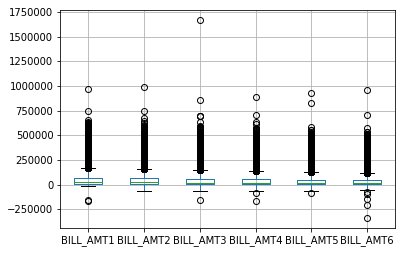

In [97]:
df[bill_amt_cols].boxplot();

### Preprocessing
Currently "Sex" is coded as 2 for "female" and 1 for "male". As this is encoded as binary we will change the column name to "FEMALE" and subtract 1 from each value - thus 1 will be "Female" and 0 "Male".

Both Education and Marriage are categorical with multiple options. `pd.get_dummies()` will allow us to create n-1 binary features to encode the n categories.  

#### Note regarding `get_dummies()`
`pd.get_dummies()` is **NOT** appropriate in many ML applications.  

For Example: Currently we have the values 0-6 in the "EDUCATION" feature. Suppose that when we split the training and test data, all 14 of the "0" values ended up in the test set. Running `pd.get_dummies()` on the test set would add 6 columns where the training set would only have 5 columns added from that action. then, whatever model had been fit would not know how to deal that new feature / category.  

The function is used here for simplicities' sake

In [98]:
df['SEX'] = df['SEX']-1 # change vals of 'sex' to 0,1

df.rename(columns = {'SEX':'FEMALE', "default payment next month":"default"}, inplace = True) # rename col names

for col, pre in zip(["EDUCATION", "MARRIAGE"],["EDU","MAR"]): # get dummies and rename cols for ed and marraige
    df = pd.concat([
        df.drop(col, axis = "columns"), pd.get_dummies(df[col], prefix = pre, drop_first = True)],
    axis = 'columns')
    
df.head()

,ID,LIMIT_BAL,FEMALE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,default,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,MAR_1,MAR_2,MAR_3
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,1,0,1,0,0,0,0,1,0,0
1,2,120000,1,26,-1,2,0,0,0,2,...,1,0,1,0,0,0,0,0,1,0
2,3,90000,1,34,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,4,50000,1,37,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,5,50000,0,57,-1,0,-1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


<a id = "part2"></a>
## Trees and Forests: Intro

Given a target (categorical or continuous), a decision tree iteratively splits data. It splits data at the value in whichever feature that creates the greatest separation among the target variable.

For example, say the target variable on a dataset of professional basketball players is league: NBA and WNBA. The available features are height and weight.  

Split 1: Although there are WNBA players over 6'8" tall, that is very rare. Thus, a decision tree might  split the data at the height of 6'8", 6'7" or 6'6". At that split the tree would predict that any basketball player over 6'6" plays in the NBA.  

Split 2: For players shorter than 6'6", the tree might decide to split that data again at 5'10" and predict that basketball players under 5'10" play in the WNBA.  

Split 3: For those players between 5'10" and 6'6", maybe the tree might discriminate on weight, predicting that all those players who weigh more than 180 Lbs. play in the NBA.  

The resulting tree could be visualized as below

![DTExample](./assets/DTExample.png)

### Depth

The above tree has a depth of 2.  
The maximum depth to which a is allowed to grow can be specified with `max_depth` in `sklearn`. By default, `max_depth` it is set to `None` which means the tree will grow until all leaves (terminal nodes) are pure, or until other user-specified criteria are met. Importantly, `max_depth` can impact the amount of time it takes to build a tree (this becomes especially important when starting to work with forests.)  

### Splitting

The splits in the above trees were determined intuitively. Thankfully decision Trees do not make their decisions using intuition. In the `sklearn` package two splitting criterion are available for classifiers; "gini" and "entropy". In general, "gini" splitting favors larger partitions, where "entropy" favors splitting of smaller groups that are of a single class. 

[More on Gini/Entropy](http://www.learnbymarketing.com/481/decision-tree-flavors-gini-info-gain/)

### Gini and Entropy Calculations

<table><tr><td><img src='./assets/choc.png' style="width: 70%;"></td><td><img src='./assets/choc2.png' style="width: 70%;"></td></tr></table>  


Above we have a split in a data set regarding good and bad chocolate.  

You will be asked to calculate the gini impurity in the next questions.  

The Split on "American" shows 175 good chocolates and 330 bad chocolates where `American == True`. There are 200 good and 120 bad chocolates where `American == False`  

The Split on "German" shows 110 good chocolates and 60 bad chocolates where `German == True`. There are 285 good and 390 bad chocolates where `German == False`

As a reminder; the gini-index for a node is: $$1- \sum_{j=1}^n p^2_j$$  
Where there are n classes and $p_j$ is the frequency of class j in that node.  
Finally, the indexes for each of these nodes is weighted by the proportion of data at each node, then summed.  
Remember gini-indicies closer to 0 are more "pure"

In [104]:
#american impurity
tot_tru = 175 + 330 
gini_tru = 1 - (175/tot_tru)**2 - (330/tot_tru)**2
tot_fal = 220 + 120
gini_fal = 1 - (220/tot_fal)**2 - (120/tot_fal)**2

gini = tot_tru/(tot_tru+tot_fal)*gini_tru + tot_fal/(tot_tru+tot_fal)*gini_fal
ans1 = gini

In [106]:
#german impurity
tot_tru = 110 + 60 
gini_tru = 1 - (110/tot_tru)**2 - (60/tot_tru)**2
tot_fal = 285 + 390
gini_fal = 1 - (285/tot_fal)**2 - (390/tot_fal)**2

gini = tot_tru/(tot_tru+tot_fal)*gini_tru + tot_fal/(tot_tru+tot_fal)*gini_fal

ans1 = gini

### Forests

"Forests" are collections of decision trees designed to protect against over-fitting.  
A single decision tree (particularly one that is allowed to grow to any depth), may be prone to overfitting. Algorithmically, the tree is designed to continue to make splits until it has completely classified all of the available data, and/or exhausted every possible split. Thus, no complexity and no particular is too fine for the tree to split upon. A tree might be "pruned" (by setting max_depth) to protect against over fitting, but, a "forest" of trees might also be used instead.  

### Building Tree / Forest Models  
#### Question 9:
Baseline Accuracy

#### Import models and metrics; create train-test split

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Create tts 
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("default", axis = 'columns'), df['default'],
    test_size = .3, random_state = 1738)

# Instantiate tree and forest models
dt = DecisionTreeClassifier()
bag = BaggingClassifier()
rf = RandomForestClassifier()
et = ExtraTreesClassifier()

#### Look at performance of classifiers using default parameters

In [113]:
dt.fit(X_train, y_train)
print("Decision Tree: \n", classification_report(y_test, dt.predict(X_test)), "\n")


print("-----------")

bag.fit(X_train, y_train)
print("Bagging: \n", classification_report(y_test, bag.predict(X_test)), "\n")



print("-----------")

rf.fit(X_train, y_train)
print("Random Forest: \n", classification_report(y_test, rf.predict(X_test)), "\n")

print("------------")

et.fit(X_train, y_train)
print("Extra Trees: \n", classification_report(y_test, et.predict(X_test)), "\n")



Decision Tree: 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      7042
           1       0.37      0.40      0.39      1958

   micro avg       0.72      0.72      0.72      9000
   macro avg       0.60      0.61      0.60      9000
weighted avg       0.73      0.72      0.73      9000
 

-----------
Bagging: 
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      7042
           1       0.59      0.31      0.41      1958

   micro avg       0.80      0.80      0.80      9000
   macro avg       0.71      0.63      0.65      9000
weighted avg       0.78      0.80      0.78      9000
 

-----------


/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest: 
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      7042
           1       0.60      0.31      0.41      1958

   micro avg       0.80      0.80      0.80      9000
   macro avg       0.71      0.63      0.65      9000
weighted avg       0.78      0.80      0.78      9000
 

------------


/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Extra Trees: 
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      7042
           1       0.57      0.31      0.40      1958

   micro avg       0.80      0.80      0.80      9000
   macro avg       0.70      0.62      0.64      9000
weighted avg       0.77      0.80      0.77      9000
 



<a id = "part3"></a>

## Part 3: Hyper Parameter Tuning

It appears both the Random Forest and the Extra Trees perform in a similarly effective manner. For this section, we will try to increase the performance of the Random Forest by tuning a couple hyper parameters, namely `criterion` and `estimators`

Because we are more interested in forecasting defaults than non-defaults, we will optimize on the recall of defaults -- recall is the proportion of defaults predicted over total defaults.  

The below will not run on Vocareum due to processing constraints, thus the output is copied below:

In [116]:
# %%time
# from sklearn.metrics import recall_score
# criterion = ['gini', 'entropy']
# n_estimators = [5,10,20, 50, 100]
# scores = dict()
# i = 0
# for c in criterion:
#     for e in n_estimators:
#         rf = RandomForestClassifier(n_estimators = e, criterion = c, random_state = 1738)
#         rf.fit(X_train, y_train)
#         scores[i] = {'recall':recall_score(y_test, rf.predict(X_test)), 'trees' :e, "crit":c}
#         i+=1

In [117]:
# pd.DataFrame(scores).T

![recallScores](./assets/recallScores3.PNG)

With a general sense that maybe a `RandomForestClassifier` will perform best using `gini` splittling with somewhere around 5 trees, further hyper-parameter tuning below.

In [120]:
# n_estimators = [1,2,3,4,5,6,7,8]
# scores2 = dict()
# i = 0
# for e in n_estimators:
#     rf = RandomForestClassifier(n_estimators = e, criterion = 'gini', random_state = 1738)
#     rf.fit(X_train, y_train)
#     scores2[i] = {'recall':recall_score(y_test, rf.predict(X_test)), 'trees' :e}
#     i+=1

In [121]:
# pd.DataFrame(scores2).T

![recallScores2](./assets/recallScores4.PNG)

While it might be tempting to try to tune-and-tune-and-tune hyper-parameters to increase scores, in many cases (as in the example above) hyper-parameter tuning mostly results in ***not** creating a better model*, but a model that does a better job of predicting the test set.  